In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline


In [2]:
matplotlib.rcParams['figure.figsize'] = (8, 6) # set default figure size, 8in by 6in

This week we will be stepping back a bit and will be trying to give some practical advice on how to debug and improve your learning
algorithms for real tasks.  The companion videos this week will talk about how to tell when a learning algorithm is doing poorly,
and describe the 'best practices' for how to 'debug' your learning algorithm and go about improving its performance.

We will also dip into machine learning ystem design.  To optimize a machine learning algorithm, you will need to first 
understand where the biggest improvements can be made.  In these lessons, we discuss how to understand the performance of a 
machine learning system with multiple parts, and also how to deal with skewed data.

When you're applying machine learning to a real problem, a sold grasp of this weeks practical advice will easily save you a large
amount of work.

# Video W6 01: Deciding What to Try Next

[YouTube Video Link](https://www.youtube.com/watch?v=c03aZtGvKVw&index=59&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

Practical suggestions and guidelines.  Suppose you are developing or trying to improve the performance of a machine learning
system.  How do you what are the promising avenues to try next, to have the most likely chance of improving the systems performance?

**Debugging a Learning Algorithm**

What should you try next?

- Get more training examples.  (Often helpful, but not always, and not always practicable).
- Try a smaller set of features. (Can be useful if model is being overfitted, to prevent overfitting).
- Try getting additional features. (Again usually helpful, but not always and not always practicable).
- Try adding polynomial features (e.g. $x_1^2, x_2^2, x_1x_2$, etc.)
- Try decreasing and/or increasing the regularization parameter $\lambda$

**One simple Technique that will blow your mind**

The instructor begins to sound a bit click-baity in the video at this point, but this is really a very important bit of practical
advice being given here.  The difference between a successful application of machine learning and an unsuccessful one resides in
the art of these types of diagnostics, so we can really get evidence and know with some certainity what things are more likely to
be helpful to try, and what things will be useless to work on if we want to improve the system performance.

The next few videos will introduce some diagnostic tests that can be useful in focusing in on or ruling out some of the list of
things we mentioned above to try.  Such diagnostics can take time to implement, but will potentially pay off many times over in
allowing us to understand which things we should put our effort into to improve the machine learning performance.  



# Video W6 02: Evaluating a Hypothesis

[YouTube Video Link](https://www.youtube.com/watch?v=m7JeOLm8wog&index=60&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

**Problem 1**: How do we evaluate if a learned hypothesis is potentially overfitting the data?  The basic idea is that we need
to split up our data and only train the model on a portion of our data.  We then use the held back data to test the performance.
If the performance on the test set is much worse than the performance we get on the trained data, then it is likely the model
has been overfitted (do you understand why?  make sure you follow why this is the case).  A typical split is something like use
70% of the data for training, and 30% of the data for testing.

Lets read in the example house price data from week 03, which has data with a single dimension (the size of houses), and the
value we want to predict using linear regression (the price of the house).

Text(0, 0.5, 'Price (in 1000s $)')

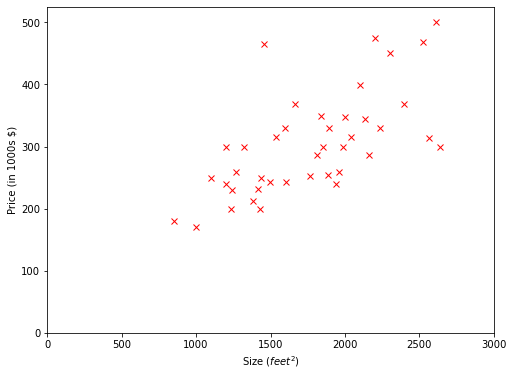

In [3]:
# read in the house size vs. price data to use as an example
house = pd.read_csv('data/housing-prices-portland-or.csv')
house.price = house.price / 1000.0 # in video, we specify prices in terms of 1000s of dollars
x = house.sqft.values 
y = house.price.values

plt.plot(x, y, 'rx')
plt.axis([0, 3000, 0, 525])
plt.xlabel('Size ($feet^2$)')
plt.ylabel('Price (in 1000s $)')

In [4]:
print(len(x))
print(x)
print(y)

47
[2104 1600 2400 1416 3000 1985 1534 1427 1380 1494 1940 2000 1890 4478
 1268 2300 1320 1236 2609 3031 1767 1888 1604 1962 3890 1100 1458 2526
 2200 2637 1839 1000 2040 3137 1811 1437 1239 2132 4215 2162 1664 2238
 2567 1200  852 1852 1203]
[399.9   329.9   369.    232.    539.9   299.9   314.9   198.999 212.
 242.5   239.999 347.    329.999 699.9   259.9   449.9   299.9   199.9
 499.998 599.    252.9   255.    242.9   259.9   573.9   249.9   464.5
 469.    475.    299.9   349.9   169.9   314.9   579.9   285.9   249.9
 229.9   345.    549.    287.    368.5   329.9   314.    299.    179.9
 299.9   239.5  ]


The data has 47 houses.  The data is in no particular order.  However, you can sometimes get a data set that has been sorted or 
ordered in some way.  For example, our data set could have been sorted by the square footage (notice in the next cell I use
`argsort()` to get the indices that would sort `x`, then sort both `x` and `y` so that the items in each array still correctly
correspond to one another).

In [5]:
# get the indexes that would sort the x array in ascending order by the square feet, and then
# rearrange both x and y by this sorting
sorted_idx = np.argsort(x)
x = x[sorted_idx]
y = y[sorted_idx]
print(x)
print(y)

[ 852 1000 1100 1200 1203 1236 1239 1268 1320 1380 1416 1427 1437 1458
 1494 1534 1600 1604 1664 1767 1811 1839 1852 1888 1890 1940 1962 1985
 2000 2040 2104 2132 2162 2200 2238 2300 2400 2526 2567 2609 2637 3000
 3031 3137 3890 4215 4478]
[179.9   169.9   249.9   299.    239.5   199.9   229.9   259.9   299.9
 212.    232.    198.999 249.9   464.5   242.5   314.9   329.9   242.9
 368.5   252.9   285.9   349.9   299.9   255.    329.999 239.999 259.9
 299.9   347.    314.9   399.9   345.    287.    475.    329.9   449.9
 369.    469.    314.    499.998 299.9   539.9   599.    579.9   573.9
 549.    699.9  ]


As mentioned in the video, if the data is sorted or arranged in some pattern, we can't simply take a 70/30 split to create
train and test data sets.  For example, if we did that for the now sorted data above, we would end up with all of the lowest
square foot houses in the training data, and all of the biggest houses for our test set, which with a little thinking you should
be able to convince yourself this would not be a good idea.  Lets randomly (re)shuffle up the data, to ensure when we
split it we get representative training and test items over the full range of data.

In [6]:
# get a set of indexes from 0 to 46 in a random order, then reorder both x and y
# in this new same random ordering
np.random.seed(42) # set seed so that notebooks are the same when students run, change this to see different results
random_idx = np.random.permutation(len(x))
x = x[random_idx]
y = y[random_idx]
print(x)
print(y)

[1985 2609 1962 3137 1890 2400 1437 1767 1203 1940 1320 1200 1239 2637
 2200 1458 1604 3890 1534 1380 1600 2040 2162 4215  852 2132 2104 1236
 1427 2238 1000 3000 1839 1100 2300 1888 2526 1416 1852 1664 4478 1811
 1268 3031 1494 2000 2567]
[299.9   499.998 259.9   579.9   329.999 369.    249.9   252.9   239.5
 239.999 299.9   299.    229.9   299.9   475.    464.5   242.9   573.9
 314.9   212.    329.9   314.9   287.    549.    179.9   345.    399.9
 199.9   198.999 329.9   169.9   539.9   349.9   249.9   449.9   255.
 469.    232.    299.9   368.5   699.9   285.9   259.9   599.    242.5
 347.    314.   ]


Once you are certain your data is sufficiently shuffled, it is a fairly easy task using array slicing in `Python`/`NumPy` to split
the data into test and training sets.

In [7]:
# we will split with 70% in the training set, and 30% in test set, split_idx is the index to split at 
split_idx = int(0.7 * len(x)) 

x_train = x[0:split_idx]
y_train = y[0:split_idx]
x_test = x[split_idx:]
y_test = y[split_idx:]
print(len(x_train), len(x_test))

32 15


We compute the error on the test set using the same objective cost function we use for training.  For example, the sum squared error
for linear regression, or the logistic cost function for logistic regression (e.g. the $J(\theta)$ cost function, but over the
testing data).  For classification problems, we can also use the simpler misclassification error to evaluate more directly 
what percentage of the test set in a classification problem is being classified correctly or misclassified).

As an example, lets fit a linear regression model to our training set example data, then evaluate the performance on 
the training set data and also on the test set data.


In [8]:
def compute_linear_regression_cost(theta, X, y):
    """Compute the cost function for linear regression.  
    
    Given a set of inputs X, and the correct 
    outputs for these inputs y, calculate the hypothesized outputs 
    for a given set of parameters theta.  Then we compute the sum of
    the squared differences (and divide the final result by 2*m), 
    which gives us the cost.
    
    Args
    ----
    theta (numpy nx1 array) - An array of the set of theta parameters
       to evaluate
    X (numpy mxn size array) - The example inputs, first column is expected
       to be all 1's.
    y (numpy m size array) - A vector of the correct outputs of length m
       
    Returns
    -------
    J (float) - The sum squared difference cost function for the given
       theta parameters
    """
    
    # determine the number of training examples from the size of the correct outputs
    m = len(y)
    
    # compute the cost
    J = 0.0
    hypothesis = np.dot(theta.T, X)
    J = np.sum( (hypothesis - y)**2.0 ) / (2.0 * m)
    
    return J


def compute_linear_regression_gradients(theta, X, y):
    """Compute the gradients of the theta parameters for our logistic regression
    cost function.
    
    Given a set of inputs X (we assume that the first column has been 
    initialized to 1's for the theta_0 parameter), and the correct 
    outputs for these inputs y, calculate the gradient of the cost function
    with respect to each of the theta parameters.
    
    Args
    ----
    theta (numpy nx1 array) - An array of the set of theta parameters
       to evaluate
    X (numpy mxn array) - The example inputs, first column is expected
       to be all 1's.
    y (numpy m size array) - A vector of the correct outputs of length m
       
    Returns
    -------
    gradients - A numpy n sized vector of the computed gradients.
    """

    # determine the number of training examples from the size of the correct outputs
    # and the number of parameters from the size of theta
    m = len(y)
    n = len(theta)
    
    # return the calculated gradients of theta
    gradients = np.zeros(n)

    hypothesis = np.dot(theta.T, X)
    for j in range(n):
        gradients[j] = np.sum((hypothesis - y) * X[j,:]) / m
        
    return gradients

In [9]:
m = len(y_train)
n = 2
X_Train = np.ones( (n, m) ) # add a column of 1s for the bias term
X_Train[1:,:] = x_train.T # the second column contains the raw inputs


theta = np.zeros( (n, 1) )
from scipy.optimize import minimize
res = minimize(compute_linear_regression_cost, theta, method='BFGS', 
               jac=compute_linear_regression_gradients, 
               args=(X_Train, y_train), options={'disp': True})
theta_opt = res.x # res is an object, the x variable in res has the optimized parameters
print(theta_opt) 

Optimization terminated successfully.
         Current function value: 2217.251040
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
[83.69220345  0.12578338]


In [10]:
# compute the final cost on the training set we achieved (should be equal to the res.fun returned
# from the minimize function).
error = compute_linear_regression_cost(theta_opt, X_Train, y_train)
print("Training set error:", error)

Training set error: 2217.251040023292


In [11]:
# for linear regression, we can simply reuse the cost function to compute the cost on the test
# set, or in other words the test set error
m_test = len(y_test)
n = 2
X_Test = np.ones( (n, m_test) )
X_Test[1:,:] = x_test.T # the second column contains the raw inputs

error = compute_linear_regression_cost(theta_opt, X_Test, y_test)
print("Test set error:", error)

Test set error: 1832.9251484657152


The final result is an estimate of how well the model will be able to generalize.  The error on the data set the model is trained
with (as discussed in the next video) is not a good indication of how well the model will do with unseen data.  Since we are
optimizing the model for the data we are training with, we of course expect it to get the minimal possible error it can get
given our parameters and the model (a linear one in this case) we are using.  However, if the model is overfitted or underfitted
(as we'll discuss later), then the answeres it gives will not generalize well to unseen and untrained for data.  We can use the
computed cost on the test sets to help us measure and estimate this generalization performance of a model.

# Video W6 03: Model Selection and Train Validation Test Sets

[YouTube Video Link](https://www.youtube.com/watch?v=2KQXN-8Y0ww&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=61)

Most of this video lays out why, in addition to splitting off a bit of the data to act as a test set, we sometimes need to also
set aside some of the data for a validation (or cross validation) set.  A typical split when needing a validation set is to use
60% for trainig, and 20% for testing and validation respectively).  Validation sets are necessary when we are 
comparing the performance of several different models.  Holding back the validation set allows us to 
compare the different models on
the validation set instead.  Then we can see how well the selected model will generalize on unseen data by seeing its
performance on the held back and never used test set.  When you need to compare the performance of several models
in order to pick one, it is
considered best practice to split the data into the 3 sets: test, validation and training.  We then select the model based on
the cross validation set, and then measure the generalization error performance of this selected 
model on the held back never used test set.

Lets consider the model selection problem.  In the previous cells we fitted a simple linear model with 1 parameter to the data.
Lets say we want to try fitting higher order polynomial term models to this same data, to see if we can improve the
performance.  In the video, we try and select between models with terms of order from 1 to 10:

1. $h_\theta(x) = \theta_0 + \theta_1 x$
2. $h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2$
3. $h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$

up to

10) $h_\theta(x) = \theta_0 + \theta_1 x + \cdots + \theta_{10} x^{10}$

First of all, lets reshuffle our data and split it up into train, test and validation data sets using a 60/20/20 split as
described in the video:

In [12]:
# read in the house size vs. price data to use as an example
house = pd.read_csv('data/housing-prices-portland-or.csv')
house.sqft = house.sqft / 1000.0 # so that our x^10 terms don't overflow, we specify house sizes in 1000s of sq ft.
house.price = house.price / 1000.0 # in video, we specify prices in terms of 1000s of dollars
x = house.sqft.values 
y = house.price.values

# randomly shuffle it up
np.random.seed(12)
random_idx = np.random.permutation(len(x))
x = x[random_idx]
y = y[random_idx]

# we will split train from test/validation at 60% of the data
test_idx = int(0.6 * len(x)) 
# and we split the test and validation at 80% of the data
valid_idx = int(0.8 * len(x))

x_train = x[0:test_idx]
y_train = y[0:test_idx]
m_train = len(y_train)

x_test = x[test_idx:valid_idx]
y_test = y[test_idx:valid_idx]
m_test = len(y_test)

x_valid = x[valid_idx:]
y_valid = y[valid_idx:]
m_valid = len(y_valid)

print(m_train, m_test, m_valid)


28 9 10


Now lets train 10 models using simple linear regression with added polynomial terms.  We will keep track of the parameters
we get fitted for each model in regular `Python` list called `models`.  I will also keep track of the calculated
cost on the validation set for each of the models in a list called `model_errors`.

In [13]:
models = []
model_errors = []

for i in range(10):
    
    # first set up the X matrix with the polynomial terms to train a model with
    n = i + 2 # number of parameters in the model, for i=0, we are doing the model with degree 1 polynomial, etc.
    X_Train = np.ones( (n, m_train) ) # add a column of 1s for the bias term
    X_Train[1,:] = x_train.T # the second column contains the raw inputs
    # fill in 3rd and higher columns with polynomial terms of the raw data
    for p in range(2,n):
        X_Train[p,:] = x_train.T**p
        
    # now train a model on the degree n-1 polynomial terms in X
    theta = np.zeros( (n, 1) )
    res = minimize(compute_linear_regression_cost, theta, method='L-BFGS-B', 
                   jac=compute_linear_regression_gradients, 
                   args=(X_Train, y_train), options={'disp': True, 'maxiter': 200})
    theta_opt = res.x # res is an object, the x variable in res has the optimized parameters
    models.append(theta_opt)

    # now compute the cost of this model on the validation data
    X_Valid = np.ones( (n, m_valid) ) # add a column of 1s for the bias term
    X_Valid[1,:] = x_valid.T # the second column contains the raw inputs
    # fill in 3rd and higher columns with polynomial terms of the  data
    for p in range(2,n):
        X_Valid[p,:] = x_valid.T**p
    error = compute_linear_regression_cost(theta_opt, X_Valid, y_valid)
    model_errors.append(error)
    
print(model_errors)

[1158.9102945201694, 1641.3568650167836, 2971.249136406196, 7742.312107229523, 8659.600321801667, 6479.038779575233, 1200.5204152532876, 1319.5607109984817, 25725.815294743647, 310911.80438063876]


For this data set, really the degree 1 polynomial does the best, the higher degree polynomials are not improving the error 
(though there is a lot of noise, for this particular split it almost recovers, then falls apart for very high
degree polynomials).  For example, we can plot the results of the errors on the validation sets for our 10 models to compare them:

(0.0, 11.0, 6.0, 13.0)

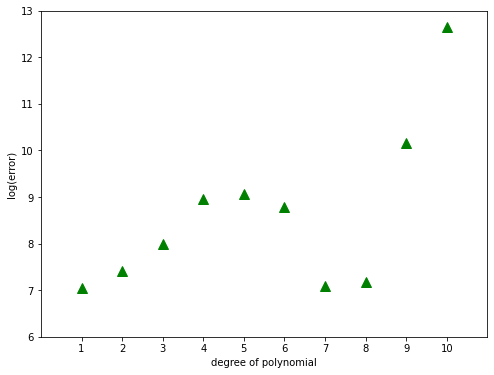

In [14]:
p = np.arange(1, 11)
plt.plot(p, np.log(model_errors), 'g^', markersize=10)
plt.xlabel('degree of polynomial')
plt.ylabel('log(error)')
plt.xticks(p)
plt.axis([0, 11, 6, 13])

And finally we can compute the expected generalization error on our best model now (the degree = 1 model) using the held back
test set.

In [15]:
theta_opt = models[0]
print(theta_opt)
n = 2 # degree 1 polynomial model has 2 termsonly , theta_0 and theta_1
X_Test = np.ones( (n, m_test) ) # add a column of 1s for the bias term
X_Test[1,:] = x_test.T # the second column contains the raw inputs
error = compute_linear_regression_cost(theta_opt, X_Test, y_test)
print("Generalization error for degree 1 model:", error)


[ 82.61799163 132.45511981]
Generalization error for degree 1 model: 1488.5185687870585


The previous example using the single variable housing price example maybe doesn't illustrate best this type of model selection,
as the degree 1 polynomial model was working the best for the given data.  Lets create a set of data that is actually a degree
4 polynomial (and add some noise), and do all of the previous again, just to illustrate that this type of optimization and
searching for a model using validation and testing sets does work.

[[ 1.9107586]
 [-0.3027249]
 [ 0.8201923]
 [ 0.6334626]
 [-0.4747853]]


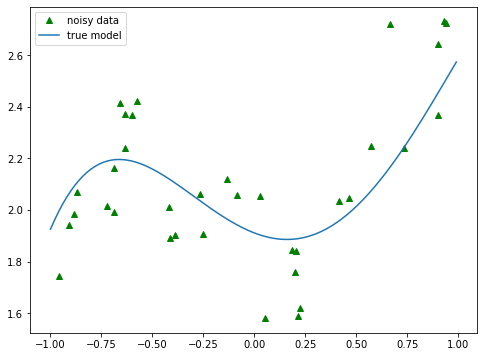

In [16]:
# create an array of parameters represeting the real function/model that is generating the data
#theta_real = np.random.normal(0.0, 0.1, size=(5,1))
#theta_real[0] = theta_real[0] * 2.0
#theta_real[1] = theta_real[1]
#theta_real[2] = theta_real[2]
#theta_real[3] = theta_real[3] / 2.0
#theta_real[4] = theta_real[4] / 4.0

#theta_real = np.array([[  1.11449268e+00],
#                       [ -1.94490974e-01],
#                       [  3.70858149e-02],
#                       [  9.44528570e-03],
#                       [ -9.18530523e-04]])

theta_real = np.array([[1.9107586],
                       [-0.3027249],
                       [ 0.8201923],
                       [ 0.6334626],
                       [-0.4747853]])
print(theta_real)


def compute_y(theta, x):
    y = theta_real[0] + theta_real[1] * x + theta_real[2] * x**2.0 + theta_real[3] * x**3.0 + theta_real[4] * x**4.0
    return y
    
#  random data points in range from -1 to 1, representing the input data
NUM_DATA_POINTS = 35
np.random.seed(42) # ensure that when  you run notebook, you get same thing I get
x = np.random.uniform(-1.0, 1.0, NUM_DATA_POINTS)

# the answer with a bit of noise added
y = compute_y(theta, x) + np.random.normal(0.0, 0.2, NUM_DATA_POINTS)


# plot the data with noise we will use
plt.plot(x, y, 'g^', label='noisy data')

# plot the true curve, with no noise
x_true = np.arange(-1.0, 1.0, 0.01)
y_true = compute_y(theta, x_true)
plt.plot(x_true, y_true, label='true model')
plt.legend(loc=2);

In [17]:
# now that we have a new x,y set of inputs and correct outputs, set up all of the train/test/validation data sets,
# and train models on polynomial combinations with degree 1 to 10 again and compare

# randomly shuffle it up
random_idx = np.random.permutation(len(x))
x = x[random_idx]
y = y[random_idx]

# we will split train from test/validation at 60% of the data
test_idx = int(0.6 * len(x)) 
# and we split the test and validation at 80% of the data
valid_idx = int(0.8 * len(x))

x_train = x[0:test_idx]
y_train = y[0:test_idx]
m_train = len(y_train)

x_test = x[test_idx:valid_idx]
y_test = y[test_idx:valid_idx]
m_test = len(y_test)

x_valid = x[valid_idx:]
y_valid = y[valid_idx:]
m_valid = len(y_valid)

print(m_train, m_test, m_valid)


21 7 7


In [18]:
models = []
model_errors = []

for i in range(10):
    
    # first set up the X matrix with the polynomial terms to train a model with
    n = i + 2 # number of parameters in the model, for i=0, we are doing the model with degree 1 polynomial, etc.
    X_Train = np.ones( (n, m_train) ) # add a column of 1s for the bias term
    X_Train[1,:] = x_train.T # the second column contains the raw inputs
    # fill in 3rd and higher columns with polynomial terms of the raw data
    for p in range(2,n):
        X_Train[p,:] = x_train.T**p
        
    # now train a model on the degree n-1 polynomial terms in X
    theta = np.zeros( (n, 1) )
    res = minimize(compute_linear_regression_cost, theta, method='BFGS', 
                   jac=compute_linear_regression_gradients, 
                   args=(X_Train, y_train), options={'disp': True, 'maxiter': 200})
    theta_opt = res.x # res is an object, the x variable in res has the optimized parameters
    models.append(theta_opt)

    # now compute the cost of this model on the validation data
    X_Valid = np.ones( (n, m_valid) ) # add a column of 1s for the bias term
    X_Valid[1,:] = x_valid.T # the second column contains the raw inputs
    # fill in 3rd and higher columns with polynomial terms of the  data
    for p in range(2,n):
        X_Valid[p,:] = x_valid.T**p
    error = compute_linear_regression_cost(theta_opt, X_Valid, y_valid)
    model_errors.append(error)
    
print(model_errors)

Optimization terminated successfully.
         Current function value: 0.037674
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 0.026163
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.019103
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.014324
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.014156
         Iterations: 39
         Function evaluations: 40
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: 0.014100
         Iterations: 37
         Function evaluations: 38
     

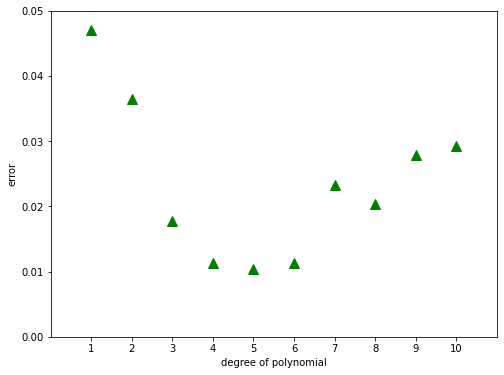

In [19]:
p = np.arange(1, 11)
plt.plot(p, model_errors, 'g^', markersize=10)
plt.xlabel('degree of polynomial')
plt.xticks(p)
plt.ylabel('error')
plt.axis([0, 11, 0, 0.05]);

So as  you can see in this figure, the model improves greatly on the validation data set from degree = 1 to degree = 6 models.
(Best performance occurs for the degree = 5 polynomial model).
After that performance gets worse, with maybe a jump and fluctuation happening after degree 6.

We can then test the generalization error performance for the degree = 5 model on the test data like this:

In [20]:
theta_opt = models[4] # 0 based indexing, so degree=1 model at index 0, and degree 4 model at index 3
print(theta_opt) # compare these to the true values of theta we used to generate the data...
n = 6 # degree 5 polynomial model has 6 terms
X_Test = np.ones( (n, m_test) ) # add a column of 1s for the bias term
X_Test[1,:] = x_test.T # the second column contains the raw inputs
error = compute_linear_regression_cost(theta_opt, X_Test, y_test)
print("Generalization error for degree 5 model:", error)


[ 1.83862292 -0.39604419  1.59359571  1.44167014 -1.30384419 -0.57932539]
Generalization error for degree 5 model: 0.69732460740902


# Video W6 04: Diagnosing Bias vs. Variance


[YouTube Video Link](https://www.youtube.com/watch?v=tTSssB9OuI4&index=62&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

If your learning algorithm is not performing as well as you like, you almost always have either an overfitting problem
(known as a high variance problem ) or an underfitting problem (a problem of high bias).  It is important to determine
whether it is bias or variance that is causing a problem with the performance.

Just to be clear, lets look at the following figure from the video:


/opt/anaconda3/envs/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


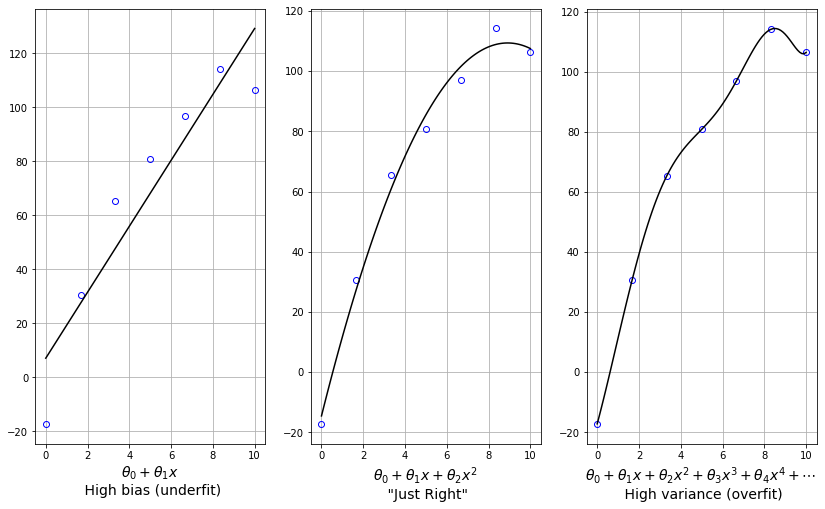

In [21]:
# generate some quadratic data with just a little noise
theta_0 = -10.0
theta_1 = 24.0
theta_2 = -1.25

x = np.linspace(0.0, 10.0, 7)
y = theta_0 + theta_1 * x + theta_2 * x**2
y = y + np.random.normal(0.0, 8.0, (7,))

x_hypothesis = np.linspace(0.0, 10.0, 100)

plt.figure(figsize=(14,8))
plt.subplot(1,3,1)
plt.plot(x, y, 'bo', fillstyle='none')
theta = np.polyfit(x, y, 1)
h = np.poly1d(theta)
plt.plot(x_hypothesis, h(x_hypothesis), 'k-')
plt.xlabel('$\\theta_0 + \\theta_1 x$ \n High bias (underfit)', fontsize=14)
plt.grid();

plt.subplot(1, 3, 2)
plt.plot(x, y, 'bo', fillstyle='none')
theta = np.polyfit(x, y, 2)
h = np.poly1d(theta)
plt.plot(x_hypothesis, h(x_hypothesis), 'k-')
plt.xlabel('$\\theta_0 + \\theta_1 x + \\theta_2 x^2$ \n "Just Right"', fontsize=14)
plt.grid();

plt.subplot(1, 3, 3)
plt.plot(x, y, 'bo', fillstyle='none')
theta = np.polyfit(x, y, 10)
h = np.poly1d(theta)
plt.plot(x_hypothesis, h(x_hypothesis), 'k-')
plt.xlabel('$\\theta_0 + \\theta_1 x + \\theta_2 x^2 + \\theta_3 x^3 + \\theta_4 x^4 + \cdots$ \n High variance (overfit)', fontsize=14)
plt.grid();

As shown in the video, lets plot the training error and the validation error for our previous made up example.  Previously I was
only keeping the validation errors, lets rerun but keep both our training error and our validation error.  The training error
is actually returned in the final result from the `minimize()` function, and recall it is simply the final computed
cost we get after training on the training data from our cost function.

In [22]:
# I assume we still have all of the x_train, x_test, x_valid, etc. data from our previous run

# 
models = []
train_errors = [] # hold the final training set errors
valid_errors = [] # hold the computed validation set error of the final models

for i in range(10):
    
    # first set up the X matrix with the polynomial terms to train a model with
    n = i + 2 # number of parameters in the model, for i=0, we are doing the model with degree 1 polynomial, etc.
    X_Train = np.ones( (n, m_train) ) # add a column of 1s for the bias term
    X_Train[1,:] = x_train.T # the second column contains the raw inputs
    # fill in 3rd and higher columns with polynomial terms of the raw data
    for p in range(2,n):
        X_Train[p,:] = x_train.T**p
        
    # now train a model on the degree n-1 polynomial terms in X
    theta = np.zeros( (n, 1) )
    res = minimize(compute_linear_regression_cost, theta, method='BFGS', 
                   jac=compute_linear_regression_gradients, 
                   args=(X_Train, y_train), options={'disp': True, 'maxiter': 200})
    theta_opt = res.x # res is an object, the x variable in res has the optimized parameters
    models.append(theta_opt)
    train_errors.append(res.fun)
    
    # now compute the cost of this model on the validation data
    X_Valid = np.ones( (n, m_valid) ) # add a column of 1s for the bias term
    X_Valid[1,:] = x_valid.T # the second column contains the raw inputs
    # fill in 3rd and higher columns with polynomial terms of the  data
    for p in range(2,n):
        X_Valid[p,:] = x_valid.T**p
    error = compute_linear_regression_cost(theta_opt, X_Valid, y_valid)
    valid_errors.append(error)


Optimization terminated successfully.
         Current function value: 0.037674
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 0.026163
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.019103
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.014324
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.014156
         Iterations: 39
         Function evaluations: 40
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: 0.014100
         Iterations: 37
         Function evaluations: 38
     

First lets simply plot the training error as a function of the polynomial degree of our model.

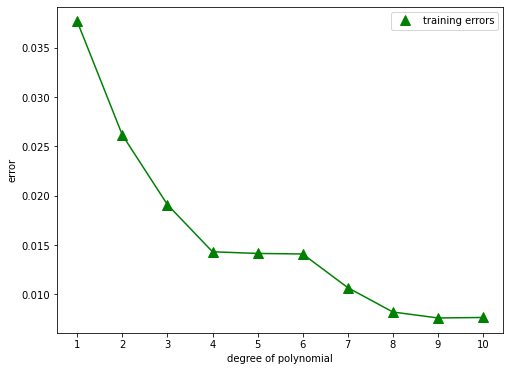

In [23]:
d = np.arange(1, 11)
plt.plot(d, train_errors, 'g^', markersize=10, label='training errors')
plt.plot(d, train_errors, 'g-')
plt.xlabel('degree of polynomial')
plt.xticks(d)
plt.ylabel('error')
plt.legend();
#plt.axis([0, 11, 0, 0.017])

As usual, training error will almost always decress as we use more parameters, as we can better fit (or overfit) the model paramters
to the particular data we are training with.


Then, as shown in the video, lets overlay with our validation error results.

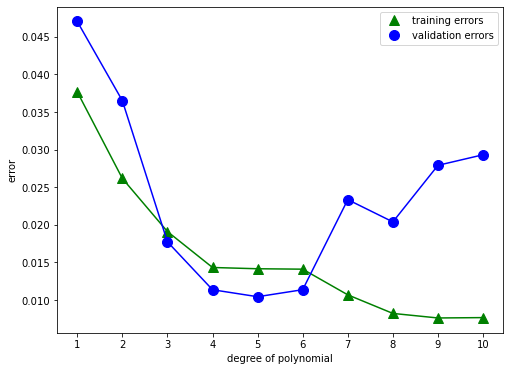

In [24]:
d = np.arange(1, 11)

# training errors
plt.plot(d, train_errors, 'g^', markersize=10, label='training errors')
plt.plot(d, train_errors, 'g-')

# validation errors
plt.plot(d, valid_errors, 'bo', markersize=10, label='validation errors')
plt.plot(d, valid_errors, 'b-')

# labels and such
plt.xlabel('degree of polynomial')
plt.xticks(d)
plt.ylabel('error')
plt.legend();
#plt.axis([0, 11, 0, 0.017]);

So the result is similar to what the video discusses.  The training and validation errors reduce till about degree 4
(the bias or underfitted regime).  On the other side of the graph, the validation errors can begin increassing, indicating
a variance regieme where we are possibly overfitting.

I did pick the random model and randomly generated data a bit to try and illustrate what was shown in the video.  If you try
generating your own data, like add more or less noise, or use fewer or greater number of points in the data
(or simply set the random seed to something different), you will see that things can really be quite a bit more messy, even
for this made up example.  You won't always see the clear type of figure as shown when comparing the training and validation
errors across models.  

<img src="figures/bias-vs-variance.png">

# Video W6 05: Regularization and Bias

[YouTube Video Link](https://www.youtube.com/watch?v=yq-9A5P-cXw&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=63)

After the discussion in more detail of bias and variance, the use of the regularization term in linear and logistic regression
will probably make more sense now.  The regularization parameter is there in such models to directly allow us to try and tune
models so that they are neither too high on variance or too high on bias (but are instead just right).

Because of the definition of the regularization parameter in our cost functions, we can actually systematically try (and even
automate) the task of finding the best value for $\lambda$ in order to balance the bias and variance for a given model
we are trying to build.  The idea is similar to how we used the cross validation set to determine the degree polynomial that
is best before, but here we compare the regularization paramter.

## Linear regression with regularization

**Model**:

\begin{equation}
h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4
\end{equation}

**Cost**:

\begin{equation}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \big( h_{\theta}(x^{(i)}) - y^{(i)}  \big)^2 + \frac{\lambda}{2m} \sum_{j=1}^m \theta_j^2
\end{equation}


- If Large $\lambda$
  - High bias (underfit)
  - $\lambda = 10000. \theta_1 \approx 0, \theta_2 \approx 0, \cdots \;\;\; h_{\theta} \approx \theta_0$
- Intermediate $\lambda$
  - "Just right"
- Small $\lambda$
  - High variance (overfit)
  - $\lambda = 0$ will fit all $\theta$ terms, which might overfit if polynomial is smaller than degree 4.
  
## Choosing the regularization parameter $\lambda$

To determine what, if any, level of regularization is needed, can do basically something like a grid search.

1. Try $\lambda = 0$
2. Try $\lambda = 0.01$
3. Try $\lambda = 0.02$
4. Try $\lambda = 0.04$
5. Try $\lambda = 0.08$

...

12. Try $\lambda = 10$



- Split data into train, validation, test (typical is a 60%/20%/20% split).
- Create and fit a model for each regularization setting using training data
- Evaluate performance on a cross validation set.
- Best performance will be used to select $\lambda$ to use.
- Evaluate final performance on test set that was never seen before in the cross validation training.

## Scikit-learn Hyperparameter Optimization

The `scikit-learn` packages have some support for automatically doing some forms of hyperparameter
exploration and optimization, like the description of the parameter grid search described here.  Most of
the functions for doing explortion and optimization of hyperparameters are found in the `model_selection`
sub library of `scikit-learn`

[scikit-learn model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

# Video W6 06: Learning Curves

[YouTube Video Link](https://www.youtube.com/watch?v=rczX4iAHhS0&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=64)

Learning curves are a very valuable tool in order to sanity check that the learning/optimization of your machine learning 
model is working correctly.

Learning curves are where we plot training and test/cv cost as a function of training set size.  But we
artifically manipulate our training set to vary the training set size from $m=1$ up to the number of
examples in our training set.

When $m$ is small you will be able to fit your training examples perfectly, so training error will be small.
As $m$ increases it gets harder and harder to fit all points perfectly.  So as $m$ increases the training error
will increase.

However for testing or cv data, when $m$ is small you won't generally well at all, so the cost will be high.  But
as more and more training examples are used, the test or cv cost will go down (until/unless yu start overfitting).

So if you model is having problems because of High Bias, the learning curve plots will look like the following:

<img src="figures/learning-curve-high-bias.png">

However if you plot the learning curve of $m$ training set size to the cost, you will see something different
if you are suffering from overfitting (high variance).  Conceptually you will see learning curves that look like this:

<img src="figures/learning-curve-high-variance.png">

# Video W6 07: Deciding What to Do Next Revisited

[YouTube Video Link](https://www.youtube.com/watch?v=Kum1UFqKEp4&index=65&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

What should you try next?

- Get more training examples  $\rightarrow$ fixes high variance
- Try a smaller set of features $\rightarrow$ fixes high variance
- Try getting additional features $\rightarrow$ fixes high bias
- Try adding polynomial features (e.g. $x_1^2, x_2^2, x_1x_2$, etc.) $\rightarrow$ fixes high bias
- Try decreasing the regularization parameter $\lambda$ $\rightarrow$ fixes high bias
- Try increasing the regularization parameter $\lambda$ $\rightarrow$ fixes high variance



In [25]:
from version_information import version_information
version_information()

         Module   Versions
---------------   ------------------------------------------------------------
    matplotlib:   ['3.2.2']
         numpy:   ['1.18.5']
        pandas:   ['1.0.5']
